In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN 
%matplotlib inline

In [43]:
df = pd.read_csv("customers.csv")

df["Annual Income (k$)"] = df["Annual Income (k$)"] * 1000

df = df.drop(columns=["CustomerID"])

columns = {"Gender": "Gender", "Age": "Age", "Annual Income (k$)": "Income", "Spending Score (1-100)": "Score"}

df = df.rename(columns=columns)

df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 0})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  200 non-null    int64
 1   Age     200 non-null    int64
 2   Income  200 non-null    int64
 3   Score   200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [44]:
scaler = StandardScaler()
x = df.values
x = scaler.fit_transform(x)
x

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [45]:
db = DBSCAN(eps=0.7, min_samples=4)
db.fit(x)
labels = db.labels_
labels

array([-1,  0, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  0,  1,
        0, -1, -1, -1,  0,  1,  0,  1,  0,  1,  0,  1,  1, -1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  2,  1,  2,  1,  2,  1,  2,  2,  3,  1,  1,  2,  3,  1,  1,
        3,  1,  2,  1,  1,  1,  2,  3,  1,  2,  1,  1,  2,  2,  2,  1,  1,
        2,  1,  1,  1,  1,  1,  3,  2,  1,  1,  3,  1,  1,  2,  3,  1,  1,
        2,  3,  2,  1,  1,  2,  2,  2,  2,  1,  1,  3,  1,  1,  1,  1,  1,
        1,  3,  1,  1,  4,  1,  1,  2,  4, -1,  4,  2,  4,  1,  1,  5,  1,
        6,  4,  5,  1,  6,  4,  1,  1,  5,  4,  2,  1,  7,  4,  2,  4,  6,
        1,  6,  1,  2,  1,  2,  1,  1,  1,  5,  1,  2,  1,  2,  1,  7,  4,
        2,  4,  2,  4,  6,  1, -1,  4, -1,  4,  7,  1,  2,  1,  7,  4,  6,
        4,  7,  1,  7,  1, -1,  1, -1,  1, -1, -1, -1, -1], dtype=int64)

In [46]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False,  True, False,  True, False,  True, False,  True, False,
        True, False, False, False,  True, False,  True, False,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True, False, False,  True,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,

In [47]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

print(unique_labels, n_clusters_)


{0, 1, 2, 3, 4, 5, 6, 7, -1} 8


In [48]:
df["CustomerType"] = labels

df["CustomerType"].value_counts()

CustomerType
 1    93
 2    33
-1    24
 4    16
 3    10
 0     8
 6     6
 7     6
 5     4
Name: count, dtype: int64

In [49]:
df = df[df["CustomerType"] != -1]
df["CustomerType"] += 1
df["CustomerType"].value_counts()

CustomerType
2    93
3    33
5    16
4    10
1     8
7     6
8     6
6     4
Name: count, dtype: int64

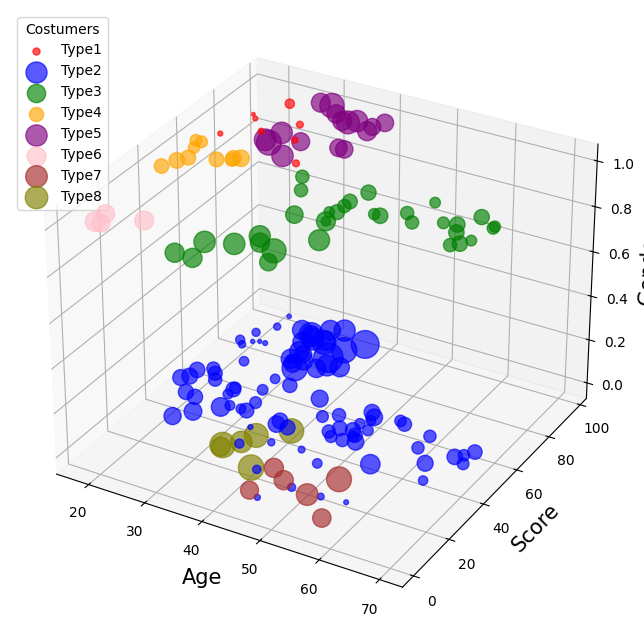

In [50]:
types = df["CustomerType"].value_counts()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatters = []
colors = ["red", "blue", "green", "orange", "purple", "pink", "brown", "olive", "gold", "cyan", "gray", "black"]

for i in range(1, len(types) + 1):
    x = df[df["CustomerType"] == i]["Age"].values
    y = df[df["CustomerType"] == i]["Score"].values
    z = df[df["CustomerType"] == i]["Gender"].values
    r = df[df["CustomerType"] == i]["Income"].values
    s = np.pi * (r ** 2) // 100000000
    
    scatter = ax.scatter(x, y, z, c=colors[i - 1], alpha=0.65, s=s, label=f"Type{i}")

    scatters.append(scatter)

ax.legend(handles=scatters, loc="upper left", title="Costumers")

ax.set_xlabel("Age", fontsize=15)
ax.set_ylabel("Score", fontsize=15)
ax.set_zlabel("Gender", fontsize=15)

plt.show()

# X -> Age
# Y -> Score
# Z -> Gender (0, 1)
# Area -> Income

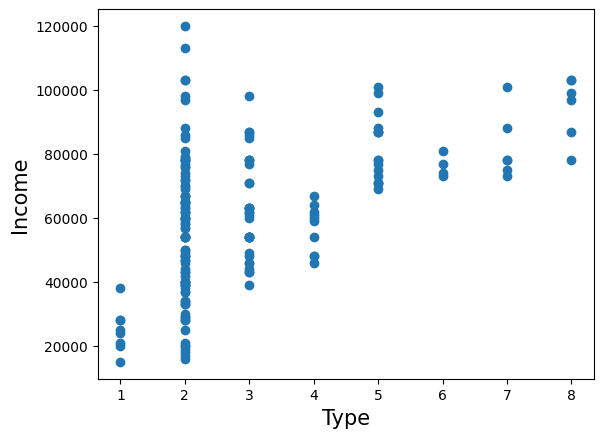

In [51]:
plt.scatter(df["CustomerType"], df["Income"])
plt.xlabel("Type", fontsize=15)
plt.ylabel("Income", fontsize=15)
plt.show()

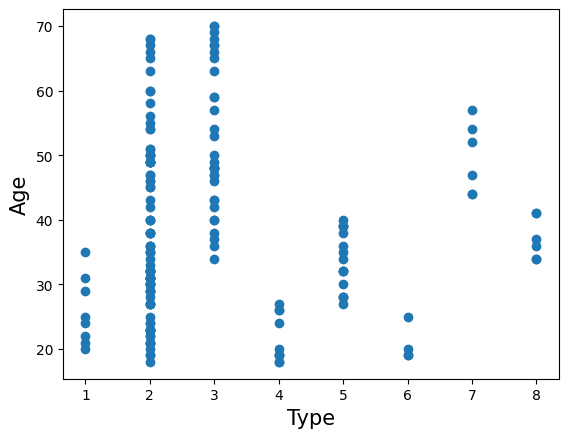

In [52]:
plt.scatter(df["CustomerType"], df["Age"])
plt.xlabel("Type", fontsize=15)
plt.ylabel("Age", fontsize=15)
plt.show()

In [53]:
df.groupby("CustomerType").mean()

,Gender,Age,Income,Score
CustomerType,,,,
1,1.0,25.875000,24875.000000,75.875000
2,0.0,37.612903,56311.827957,56.268817
3,1.0,52.090909,62878.787879,38.090909
4,1.0,21.600000,56900.000000,52.600000
5,1.0,33.562500,81562.500000,83.187500
6,1.0,20.750000,76250.000000,8.000000
7,0.0,49.666667,82166.666667,14.166667
8,0.0,37.166667,94500.000000,26.666667
